<a href="https://colab.research.google.com/github/TomasMrkva/DifferentiableSketching/blob/main/DiffSketching%2BCLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@markdown #**Anti-Disconnect for Google Colab**
#@markdown ## Run this to stop it from disconnecting automatically 
#@markdown  **(It will anyhow disconnect after 6 - 12 hrs for using the free version of Colab.)**
#@markdown  *(Colab Pro users will get about 24 hrs usage time)*
#@markdown ---

import IPython
js_code = '''
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}
setInterval(ClickConnect,60000)
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

In [11]:
#@markdown #**Download Libraries**
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)


!pip install git+https://github.com/TomasMrkva/DifferentiableSketching &> /dev/null 
!pip install torch>=1.7.0 setuptools>=50.3.1 quickdraw>=0.1.0 numpy>=1.19.2 pillow>=8.0.1 tqdm>=4.54.1 pyx>=0.15 torchvision>=0.8.1 matplotlib>=3.3.2 requests>=2.25.0 ipython>=7.19.0 torchbearer>=0.5.3.dev0 lpips>=0.1.2 scikit-learn>=0.24.1 scikit-image~=0.17.2 celluloid &> /dev/null 
!pip install git+https://github.com/openai/CLIP.git &> /dev/null
!apt-get install -qq xattr

Selecting previously unselected package python3-cffi-backend.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../0-python3-cffi-backend_1.11.5-1_amd64.deb ...
Unpacking python3-cffi-backend (1.11.5-1) ...
Selecting previously unselected package python3-ply.
Preparing to unpack .../1-python3-ply_3.11-1_all.deb ...
Unpacking python3-ply (3.11-1) ...
Selecting previously unselected package python3-pycparser.
Preparing to unpack .../2-python3-pycparser_2.18-2_all.deb ...
Unpacking python3-pycparser (2.18-2) ...
Selecting previously unselected package python3-cffi.
Preparing to unpack .../3-python3-cffi_1.11.5-1_all.deb ...
Unpacking python3-cffi (1.11.5-1) ...
Selecting previously unselected package python3-pkg-resources.
Preparing to unpack .../4-python3-pkg-resources_39.0.1-2_all.deb ...
Unpacking python3-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python3-xattr.
Preparing to unpack .../5-python3-xattr_0.9.2-0ubuntu1_

In [1]:
#@markdown #**Import libraries and Load CLIP**
import torch
import clip
import argparse
import random
import yaml
import io

import math
from pathlib import Path
import importlib

import numpy as np
import torch
from torchvision.utils import save_image
import torchvision.transforms as transforms
from tqdm import tqdm

# from dsketch.experiments.shared.args_losses import loss_choices, get_loss
# from dsketch.raster.composite import softor, over
# from dsketch.raster.disttrans import point_edt2, line_edt2, curve_edt2_polyline, centripetal_catmull_rom_spline
from dsketch.utils.pyxdrawing import draw_points_lines_crs
from dsketch.experiments.imageopt.imageopt import save_image, save_pdf, save_vector, make_init_params, clamp_params, exp, clamp_colour_params, render_lines, render_points, render_crs, render

import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import HTML
from IPython.display import Image as Img
from celluloid import Camera

# import requests
# from io import BytesIO

# response = requests.get("https://raw.githubusercontent.com/TomasMrkva/DifferentiableSketching/main/data/vancouver.jpg")
# image = Image.open(BytesIO(response.content))
# image = image.resize((224,224), Image.ANTIALIAS)

plt.rcParams['animation.embed_limit'] = 2**128

device = torch.device('cuda')

model, preprocess = clip.load('ViT-B/32', device, jit=False)
nouns = "aardvark abyssinian accelerator accordion account accountant acknowledgment acoustic acrylic act action active activity actor actress adapter addition address adjustment adult advantage advertisement advice afghanistan africa aftermath afternoon aftershave afterthought age agenda agreement air airbus airmail airplane airport airship alarm albatross alcohol algebra algeria alibi alley alligator alloy almanac alphabet alto aluminium aluminum ambulance america amount amusement anatomy anethesiologist anger angle angora animal anime ankle answer ant antarctica anteater antelope anthony anthropology apartment apology apparatus apparel appeal appendix apple appliance approval april aquarius arch archaeology archeology archer architecture area argentina argument aries arithmetic arm armadillo armchair armenian army arrow art ash ashtray asia asparagus asphalt asterisk astronomy athlete atm atom attack attempt attention attic attraction august aunt australia australian author authorisation authority authorization avenue babies baboon baby back backbone bacon badge badger bag bagel bagpipe bail bait baker bakery balance balinese ball balloon bamboo banana band bandana bangladesh bangle banjo bank bankbook banker bar barbara barber barge baritone barometer base baseball basement basin basket basketball bass bassoon bat bath bathroom bathtub battery battle bay beach bead beam bean bear beard beast beat beautician beauty beaver bed bedroom bee beech beef beer beet beetle beggar beginner begonia behavior belgian belief believe bell belt bench bengal beret berry bestseller betty bibliography bicycle bike bill billboard biology biplane birch bird birth birthday bit bite black bladder blade blanket blinker blizzard block blood blouse blow blowgun blue board boat bobcat body bolt bomb bomber bone bongo bonsai book bookcase booklet boot border botany bottle bottom boundary bow bowl bowling box boy bra brace bracket brain brake branch brand brandy brass brazil bread break breakfast breath brian brick bridge british broccoli brochure broker bronze brother brother-in-law brow brown brush bubble bucket budget buffer buffet bugle building bulb bull bulldozer bumper bun burglar burma burn burst bus bush business butane butcher butter button buzzard cabbage cabinet cable cactus cafe cake calculator calculus calendar calf call camel camera camp can canada canadian cancer candle cannon canoe canvas cap capital cappelletti capricorn captain caption car caravan carbon card cardboard cardigan care carnation carol carp carpenter carriage carrot cart cartoon case cast castanet cat catamaran caterpillar cathedral catsup cattle cauliflower cause caution cave c-clamp cd ceiling celery celeste cell cellar cello celsius cement cemetery cent centimeter century ceramic cereal certification chain chair chalk chance change channel character chard charles chauffeur check cheek cheese cheetah chef chemistry cheque cherries cherry chess chest chick chicken chicory chief child children chill chime chimpanzee chin china chinese chive chocolate chord christmas christopher chronometer church cicada cinema circle circulation cirrus citizenship city clam clarinet class claus clave clef clerk click client climb clipper cloakroom clock close closet cloth cloud cloudy clover club clutch coach coal coast coat cobweb cockroach cocktail cocoa cod coffee coil coin coke cold collar college collision colombia colon colony color colt column columnist comb comfort comic comma command commission committee community company comparison competition competitor composer composition computer condition condor cone confirmation conga congo conifer connection consonant continent control cook cooking copper copy copyright cord cork cormorant corn cornet correspondent cost cotton couch cougar cough country course court cousin cover cow cowbell crab crack cracker craftsman crate crawdad crayfish crayon cream creator creature credit creditor creek crib cricket crime criminal crocodile crocus croissant crook crop cross crow crowd crown crush cry cub cuban cucumber cultivator cup cupboard cupcake curler currency current curtain curve cushion custard customer cut cuticle cycle cyclone cylinder cymbal dad daffodil dahlia daisy damage dance dancer danger daniel dash dashboard database date daughter david day dead deadline deal death deborah debt debtor decade december decimal decision decrease dedication deer defense deficit degree delete delivery den denim dentist deodorant department deposit description desert design desire desk dessert destruction detail detective development dew diamond diaphragm dibble dictionary dietician difference digestion digger digital dill dime dimple dinghy dinner dinosaur diploma dipstick direction dirt disadvantage discovery discussion disease disgust dish distance distribution distributor diving division divorced dock doctor dog dogsled doll dollar dolphin domain donald donkey donna door dorothy double doubt downtown dragon dragonfly drain drake drama draw drawbridge drawer dream dredger dress dresser dressing drill drink drive driver driving drizzle drop drug drum dry dryer duck duckling dugout dungeon dust eagle ear earth earthquake ease east edge edger editor editorial education edward eel effect egg eggnog eggplant egypt eight elbow element elephant elizabeth ellipse emery employee employer encyclopedia end enemy energy engine engineer engineering english enquiry entrance environment epoch epoxy equinox equipment era error estimate ethernet ethiopia euphonium europe evening event examination example exchange exclamation exhaust ex-husband existence expansion experience expert explanation ex-wife eye eyebrow eyelash eyeliner face facilities fact factory fahrenheit fairies fall family fan fang farm farmer fat father father-in-law faucet fear feast feather feature february fedelini feedback feeling feet felony female fender ferry ferryboat fertilizer fiber fiberglass fibre fiction field fifth fight fighter file find fine finger fir fire fired fireman fireplace firewall fish fisherman flag flame flare flat flavor flax flesh flight flock flood floor flower flugelhorn flute fly foam fog fold font food foot football footnote force forecast forehead forest forgery fork form format fortnight foundation fountain fowl fox foxglove fragrance frame france freckle freeze freezer freighter french freon friction friday fridge friend frog front frost frown fruit fuel fur furniture galley gallon game gander garage garden garlic gas gasoline gate gateway gauge gazelle gear gearshift geese gemini gender geography geology geometry george geranium german germany ghana ghost giant giraffe girdle girl gladiolus glass glider gliding glockenspiel glove glue goal goat gold goldfish golf gondola gong good-bye goose gore-tex gorilla gosling government governor grade grain gram granddaughter grandfather grandmother grandson grape graphic grass grasshopper gray grease great-grandfather great-grandmother greece greek green grenade grey grill grip ground group grouse growth guarantee guatemalan guide guilty guitar gum gun gym gymnast hacksaw hail hair haircut half-brother half-sister halibut hall hallway hamburger hammer hamster hand handball handicap handle handsaw harbor hardboard hardcover hardhat hardware harmonica harmony harp hat hate hawk head headlight headline health hearing heart heat heaven hedge height helen helicopter helium hell helmet help hemp hen heron herring hexagon hill himalayan hip hippopotamus history hobbies hockey hoe hole holiday home honey hood hook hope horn horse hose hospital hot hour hourglass house hovercraft hub hubcap humidity humor hurricane hyacinth hydrant hydrofoil hydrogen hyena hygienic ice icebreaker icicle icon idea ikebana illegal imprisonment improvement impulse inch income increase index india indonesia industry ink innocent input insect instruction instrument insulation insurance interactive interest internet interviewer intestine invention inventory invoice iran iraq iris iron island israel italian italy jacket jaguar jail jam james january japan japanese jar jasmine jason jaw jeans jeep jeff jelly jellyfish jennifer jet jewel jogging john join joke joseph journey judge judo juice july jumbo jump jumper june jury justice jute kale kamikaze kangaroo karate karen kayak kendo kenneth kenya ketchup kettle kettledrum kevin key keyboard keyboarding kick kidney kilogram kilometer kimberly kiss kitchen kite kitten kitty knee knickers knife knight knot knowledge kohlrabi korean laborer lace ladybug lake lamb lamp lan land landmine language larch lasagna latency latex lathe laugh laundry laura law lawyer layer lead leaf learning leather leek leg legal lemonade lentil leo leopard letter lettuce level libra library license lier lift light lightning lilac lily limit linda line linen link lion lip lipstick liquid liquor lisa list literature litter liver lizard llama loaf loan lobster lock locket locust look loss lotion love low lumber lunch lunchroom lung lunge lute luttuce lycra lynx lyocell lyre lyric macaroni machine macrame magazine magic magician maid mail mailbox mailman makeup malaysia male mall mallet man manager mandolin manicure manx map maple maraca marble march margaret margin maria marimba mark mark market married mary mascara mask mass match math mattock may mayonnaise meal measure meat mechanic medicine meeting melody memory men menu mercury message metal meteorology meter methane mexican mexico mice michael michelle microwave middle mile milk milkshake millennium millimeter millisecond mimosa mind mine minibus mini-skirt minister mint minute mirror missile mist mistake mitten moat modem mole mom monday money monkey month moon morning morocco mosque mosquito mother mother-in-law motion motorboat motorcycle mountain mouse moustache mouth move multi-hop multimedia muscle museum music musician mustard myanmar nail name nancy napkin narcissus nation neck need needle neon nepal nephew nerve nest net network news newsprint newsstand nic nickel niece nigeria night nitrogen node noise noodle north north america north korea norwegian nose note notebook notify novel november number numeric nurse nut nylon oak oatmeal objective oboe observation occupation ocean ocelot octagon octave october octopus odometer offence offer office oil okra olive onion open opera operation ophthalmologist opinion option orange orchestra orchid order organ organisation organization ornament ostrich otter ounce output outrigger oval oven overcoat owl owner ox oxygen oyster package packet page pail pain paint pair pajama pakistan palm pamphlet pan pancake pancreas panda pansy panther panties pantry pants panty pantyhose paper paperback parade parallelogram parcel parent parentheses park parrot parsnip part particle partner partridge party passbook passenger passive pasta paste pastor pastry patch path patient patio patricia paul payment pea peace peak peanut pear pedestrian pediatrician peen peer-to-peer pelican pen penalty pencil pendulum pentagon peony pepper perch perfume period periodical peripheral permission persian person peru pest pet pharmacist pheasant philippines philosophy phone physician piano piccolo pickle picture pie pig pigeon pike pillow pilot pimple pin pine ping pink pint pipe pisces pizza place plain plane planet plant plantation plaster plasterboard plastic plate platinum play playground playroom pleasure plier plot plough plow plywood pocket poet point poison poland police policeman polish politician pollution polo polyester pond popcorn poppy population porch porcupine port porter position possibility postage postbox pot potato poultry pound powder power precipitation preface prepared pressure price priest print printer prison probation process processing produce product production professor profit promotion propane property prose prosecution protest protocol pruner psychiatrist psychology ptarmigan puffin pull puma pump pumpkin punch punishment puppy purchase purple purpose push pvc pyjama pyramid quail quality quart quarter quartz queen question quicksand quiet quill quilt quince quit quiver quotation rabbi rabbit racing radar radiator radio radish raft rail railway rain rainbow raincoat rainstorm rake ramie random range rat rate raven ravioli ray rayon reaction reading reason receipt recess record recorder rectangle red reduction refrigerator refund regret reindeer relation relative religion relish reminder repair replace report representative request resolution respect responsibility rest restaurant result retailer revolve revolver reward rhinoceros rhythm rice richard riddle rifle ring rise risk river riverbed road roadway roast robert robin rock rocket rod roll romania romanian ronald roof room rooster root rose rotate route router rowboat rub rubber rugby rule run russia russian rutabaga ruth sack sagittarius sail sailboat sailor salad salary sale salesman salmon salt sampan samurai sand sandra sandwich santa sarah sardine satin saturday sauce saudi arabia sausage save saw saxophone scale scallion scanner scarecrow scarf scene scent schedule school science scissors scooter scorpio scorpion scraper screen screw screwdriver sea seagull seal seaplane search seashore season seat second secretary secure security seed seeder segment select selection self semicircle semicolon sense sentence separated september servant server session sex shade shadow shake shallot shame shampoo shape share shark sharon shears sheep sheet shelf shell shield shingle ship shirt shock shoe shoemaker shop shorts shoulder shovel show shrimp shrine siamese siberian side sideboard sidecar sidewalk sign signature silica silk silver sing singer single sink sister sister-in-law size skate skiing skill skin skirt sky slash slave sled sleep sleet slice slime slip slipper slope smash smell smile smoke snail snake sneeze snow snowboarding snowflake snowman snowplow snowstorm soap soccer society sociology sock soda sofa softball softdrink software soil soldier son song soprano sort sound soup sousaphone south africa south america south korea soy soybean space spade spaghetti spain spandex spark sparrow spear specialist speedboat sphere sphynx spider spike spinach spleen sponge spoon spot spring sprout spruce spy square squash squid squirrel stage staircase stamp star start starter state statement station statistic steam steel stem step step-aunt step-brother stepdaughter step-daughter step-father step-grandfather step-grandmother stepmother step-mother step-sister stepson step-son step-uncle steven stew stick stinger stitch stock stocking stomach stone stool stop stopsign stopwatch store storm story stove stranger straw stream street streetcar stretch string structure study sturgeon submarine substance subway success sudan suede sugar suggestion suit summer sun sunday sundial sunflower sunshine supermarket supply support surfboard surgeon surname surprise susan sushi swallow swamp swan sweater sweatshirt sweatshop swedish sweets swim swimming swing swiss switch sword swordfish sycamore syria syrup system table tablecloth tabletop tachometer tadpole tail tailor taiwan talk tank tanker tanzania target taste taurus tax taxi taxicab tea teacher teaching team technician teeth television teller temper temperature temple tempo tendency tennis tenor tent territory test text textbook texture thailand theater theory thermometer thing thistle thomas thought thread thrill throat throne thumb thunder thunderstorm thursday ticket tie tiger tights tile timbale time timer timpani tin tip tire titanium title toad toast toe toenail toilet tomato tom-tom ton tongue tooth toothbrush toothpaste top tornado tortellini tortoise touch tower town toy tractor trade traffic trail train tramp transaction transmission transport trapezoid tray treatment tree trial triangle trick trigonometry trip trombone trouble trousers trout trowel truck trumpet trunk t-shirt tsunami tub tuba tuesday tugboat tulip tuna tune turkey turkey turkish turn turnip turnover turret turtle tv twig twilight twine twist typhoon tyvek uganda ukraine ukrainian umbrella uncle underclothes underpants undershirt underwear unit united kingdom unshielded use utensil uzbekistan vacation vacuum valley value van vase vault vegetable vegetarian veil vein velvet venezuela venezuelan verdict vermicelli verse vessel vest veterinarian vibraphone vietnam view vinyl viola violet violin virgo viscose vise vision visitor voice volcano volleyball voyage vulture waiter waitress walk wall wallaby wallet walrus war warm wash washer wasp waste watch watchmaker water waterfall wave wax way wealth weapon weasel weather wedge wednesday weed weeder week weight whale wheel whip whiskey whistle white wholesaler whorl wilderness william willow wind windchime window windscreen windshield wine wing winter wire wish witch withdrawal witness wolf woman women wood wool woolen word work workshop worm wound wrecker wren wrench wrinkle wrist writer xylophone yacht yak yam yard yarn year yellow yew yogurt yoke yugoslavian zebra zephyr zinc zipper zone zoo zoology ATM CD SUV TV aardvark abacus abbey abbreviation abdomen ability abnormality abolishment abortion abrogation absence abundance abuse academics academy accelerant accelerator accent acceptance access accessory accident accommodation accompanist accomplishment accord accordance accordion account accountability accountant accounting accuracy accusation acetate achievement achiever acid acknowledgment acorn acoustics acquaintance acquisition acre acrylic act action activation activist activity actor actress acupuncture ad adaptation adapter addiction addition address adjective adjustment admin administration administrator admire admission adobe adoption adrenalin adrenaline adult adulthood advance advancement advantage advent adverb advertisement advertising advice adviser advocacy advocate affair affect affidavit affiliate affinity afoul afterlife aftermath afternoon aftershave aftershock afterthought age agency agenda agent aggradation aggression aglet agony agreement agriculture aid aide aim air airbag airbus aircraft airfare airfield airforce airline airmail airman airplane airport airship airspace alarm alb albatross album alcohol alcove alder ale alert alfalfa algebra algorithm alias alibi alien allegation allergist alley alliance alligator allocation allowance alloy alluvium almanac almighty almond alpaca alpenglow alpenhorn alpha alphabet altar alteration alternative altitude alto aluminium aluminum amazement amazon ambassador amber ambience ambiguity ambition ambulance amendment amenity ammunition amnesty amount amusement anagram analgesia analog analogue analogy analysis analyst analytics anarchist anarchy anatomy ancestor anchovy android anesthesiologist anesthesiology angel anger angina angiosperm angle angora angstrom anguish animal anime anise ankle anklet anniversary announcement annual anorak answer ant anteater antecedent antechamber antelope antennae anterior anthropology antibody anticipation anticodon antigen antique antiquity antler antling anxiety anybody anyone anything anywhere apartment ape aperitif apology app apparatus apparel appeal appearance appellation appendix appetiser appetite appetizer applause apple applewood appliance application appointment appreciation apprehension approach appropriation approval apricot apron apse aquarium aquifer arcade arch arch-rival archaeologist archaeology archeology archer architect architecture archives area arena argument arithmetic ark arm arm-rest armadillo armament armchair armoire armor armour armpit armrest army arrangement array arrest arrival arrogance arrow art artery arthur artichoke article artifact artificer artist ascend ascent ascot ash ashram ashtray aside asparagus aspect asphalt aspic ass assassination assault assembly assertion assessment asset assignment assist assistance assistant associate association assumption assurance asterisk astrakhan astrolabe astrologer astrology astronomy asymmetry atelier atheist athlete athletics atmosphere atom atrium attachment attack attacker attainment attempt attendance attendant attention attenuation attic attitude attorney attraction attribute auction audience audit auditorium aunt authentication authenticity author authorisation authority authorization auto autoimmunity automation automaton autumn availability avalanche avenue average avocado award awareness awe axis azimuth babe baboon babushka baby bachelor back back-up backbone backburn backdrop background backpack backup backyard bacon bacterium badge badger bafflement bag bagel baggage baggie baggy bagpipe bail bait bake baker bakery bakeware balaclava balalaika balance balcony ball ballet balloon balloonist ballot ballpark bamboo ban banana band bandana bandanna bandolier bandwidth bangle banjo bank bankbook banker banking bankruptcy banner banquette banyan baobab bar barbecue barbeque barber barbiturate bargain barge baritone barium bark barley barn barometer barracks barrage barrel barrier barstool bartender base baseball baseboard baseline basement basics basil basin basis basket basketball bass bassinet bassoon bat bath bather bathhouse bathrobe bathroom bathtub battalion batter battery batting battle battleship bay bayou beach bead beak beam bean beancurd beanie beanstalk bear beard beast beastie beat beating beauty beaver beck bed bedrock bedroom bee beech beef beer beet beetle beggar beginner beginning begonia behalf behavior behaviour beheading behest behold being belfry belief believer bell belligerency bellows belly belt bench bend beneficiary benefit beret berry best-seller bestseller bet beverage beyond bias bibliography bicycle bid bidder bidding bidet bifocals bijou bike bikini bill billboard billing billion bin binoculars biology biopsy biosphere biplane birch bird bird-watcher birdbath birdcage birdhouse birth birthday biscuit bit bite bitten bitter black blackberry blackbird blackboard blackfish blackness bladder blade blame blank blanket blast blazer blend blessing blight blind blinker blister blizzard block blocker blog blogger blood bloodflow bloom bloomer blossom blouse blow blowgun blowhole blue blueberry blush boar board boat boatload boatyard bob bobcat body bog bolero bolt bomb bomber bombing bond bonding bondsman bone bonfire bongo bonnet bonsai bonus boogeyman book bookcase bookend booking booklet bookmark boolean boom boon boost booster boot bootee bootie booty border bore borrower borrowing bosom boss botany bother bottle bottling bottom bottom-line boudoir bough boulder boulevard boundary bouquet bourgeoisie bout boutique bow bower bowl bowler bowling bowtie box boxer boxspring boy boycott boyfriend boyhood boysenberry bra brace bracelet bracket brain brake bran branch brand brandy brass brassiere bratwurst bread breadcrumb breadfruit break breakdown breakfast breakpoint breakthrough breast breastplate breath breeze brewer bribery brick bricklaying bride bridge brief briefing briefly briefs brilliant brink brisket broad broadcast broccoli brochure brocolli broiler broker bronchitis bronco bronze brooch brood brook broom brother brother-in-law brow brown brownie browser browsing brunch brush brushfire brushing bubble buck bucket buckle buckwheat bud buddy budget buffalo buffer buffet bug buggy bugle builder building bulb bulk bull bull-fighter bulldozer bullet bump bumper bun bunch bungalow bunghole bunkhouse burden bureau burglar burial burlesque burn burn-out burning burrito burro burrow burst bus bush business businessman bust bustle butane butcher butler butter butterfly button buy buyer buying buzz buzzard c-clamp cabana cabbage cabin cabinet cable caboose cacao cactus caddy cadet cafe caffeine caftan cage cake calcification calculation calculator calculus calendar calf caliber calibre calico call calm calorie camel cameo camera camp campaign campaigning campanile camper campus can canal cancer candelabra candidacy candidate candle candy cane cannibal cannon canoe canon canopy cantaloupe canteen canvas cap capability capacity cape caper capital capitalism capitulation capon cappelletti cappuccino captain caption captor car carabao caramel caravan carbohydrate carbon carboxyl card cardboard cardigan care career cargo caribou carload carnation carnival carol carotene carp carpenter carpet carpeting carport carriage carrier carrot carry cart cartel carter cartilage cartload cartoon cartridge carving cascade case casement cash cashew cashier casino casket cassava casserole cassock cast castanet castle casualty cat catacomb catalogue catalysis catalyst catamaran catastrophe catch catcher category caterpillar cathedral cation catsup cattle cauliflower causal cause causeway caution cave caviar cayenne ceiling celebration celebrity celeriac celery cell cellar cello celsius cement cemetery cenotaph census cent center centimeter centre centurion century cephalopod ceramic ceramics cereal ceremony certainty certificate certification cesspool chafe chain chainstay chair chairlift chairman chairperson chaise chalet chalice chalk challenge chamber champagne champion championship chance chandelier change channel chaos chap chapel chaplain chapter character characteristic characterization chard charge charger charity charlatan charm charset chart charter chasm chassis chastity chasuble chateau chatter chauffeur chauvinist check checkbook checking checkout checkroom cheddar cheek cheer cheese cheesecake cheetah chef chem chemical chemistry chemotaxis cheque cherry chess chest chestnut chick chicken chicory chief chiffonier child childbirth childhood chili chill chime chimpanzee chin chinchilla chino chip chipmunk chit-chat chivalry chive chives chocolate choice choir choker cholesterol choosing chop chops chopstick chopsticks chord chorus chow chowder chrome chromolithograph chronicle chronograph chronometer chrysalis chub chuck chug church churn chutney cicada cigarette cilantro cinder cinema cinnamon circadian circle circuit circulation circumference circumstance cirrhosis cirrus citizen citizenship citron citrus city civilian civilisation civilization claim clam clamp clan clank clapboard clarification clarinet clarity clasp class classic classification classmate classroom clause clave clavicle clavier claw clay cleaner clearance clearing cleat cleavage clef cleft clergyman cleric clerk click client cliff climate climb clinic clip clipboard clipper cloak cloakroom clock clockwork clogs cloister clone close closet closing closure cloth clothes clothing cloud cloudburst clove clover cloves club clue cluster clutch co-producer coach coal coalition coast coaster coat cob cobbler cobweb cock cockpit cockroach cocktail cocoa coconut cod code codepage codling codon codpiece coevolution cofactor coffee coffin cohesion cohort coil coin coincidence coinsurance coke cold coleslaw coliseum collaboration collagen collapse collar collard collateral colleague collection collectivisation collectivization collector college collision colloquy colon colonial colonialism colonisation colonization colony color colorlessness colt column columnist comb combat combination combine comeback comedy comestible comfort comfortable comic comics comma command commander commandment comment commerce commercial commission commitment committee commodity common commonsense commotion communicant communication communion communist community commuter company comparison compass compassion compassionate compensation competence competition competitor complaint complement completion complex complexity compliance complication complicity compliment component comportment composer composite composition compost comprehension compress compromise comptroller compulsion computer comradeship con concentrate concentration concept conception concern concert conclusion concrete condition conditioner condominium condor conduct conductor cone confectionery conference confidence confidentiality configuration confirmation conflict conformation confusion conga congo congregation congress congressman congressperson conifer connection connotation conscience consciousness consensus consent consequence conservation conservative consideration consignment consist consistency console consonant conspiracy conspirator constant constellation constitution constraint construction consul consulate consulting consumer consumption contact contact lens contagion container content contention contest context continent contingency continuity contour contract contractor contrail contrary contrast contribution contributor control controller controversy convection convenience convention conversation conversion convert convertible conviction cook cookbook cookie cooking coonskin cooperation coordination coordinator cop cop-out cope copper copy copying copyright copywriter coral cord corduroy core cork cormorant corn corner cornerstone cornet cornflakes cornmeal corporal corporation corporatism corps corral correspondence correspondent corridor corruption corsage cosset cost costume cot cottage cotton couch cougar cough council councilman councilor councilperson counsel counseling counselling counsellor counselor count counter counter-force counterpart counterterrorism countess country countryside county couple coupon courage course court courthouse courtroom cousin covariate cover coverage coverall cow cowbell cowboy coyote crab crack cracker crackers cradle craft craftsman cranberry crane cranky crap crash crate cravat craw crawdad crayfish crayon crazy cream creation creationism creationist creative creativity creator creature creche credential credenza credibility credit creditor creek creme brulee crepe crest crew crewman crewmate crewmember crewmen cria crib cribbage cricket cricketer crime criminal crinoline crisis crisp criteria criterion critic criticism crocodile crocus croissant crook crop cross cross-contamination cross-stitch crotch croup crow crowd crown crucifixion crude cruelty cruise crumb crunch crusader crush crust cry crystal crystallography cub cube cuckoo cucumber cue cuff-link cuisine cultivar cultivator culture culvert cummerbund cup cupboard cupcake cupola curd cure curio curiosity curl curler currant currency current curriculum curry curse cursor curtailment curtain curve cushion custard custody custom customer cut cuticle cutlet cutover cutting cyclamen cycle cyclone cyclooxygenase cygnet cylinder cymbal cynic cyst cytokine cytoplasm dad daddy daffodil dagger dahlia daikon daily dairy daisy dam damage dame damn dance dancer dancing dandelion danger dare dark darkness darn dart dash dashboard data database date daughter dawn day daybed daylight dead deadline deal dealer dealing dearest death deathwatch debate debris debt debtor decade decadence decency decimal decision decision-making deck declaration declination decline decoder decongestant decoration decrease decryption dedication deduce deduction deed deep deer default defeat defendant defender defense deficit definition deformation degradation degree delay deliberation delight delivery demand democracy democrat demon demur den denim denominator density dentist deodorant department departure dependency dependent deployment deposit deposition depot depression depressive depth deputy derby derivation derivative derrick descendant descent description desert design designation designer desire desk desktop dessert destination destiny destroyer destruction detail detainee detainment detection detective detector detention determination detour devastation developer developing development developmental deviance deviation device devil dew dhow diabetes diadem diagnosis diagram dial dialect dialogue diam diamond diaper diaphragm diarist diary dibble dick dickey dictaphone dictator diction dictionary die diesel diet difference differential difficulty diffuse dig digestion digestive digger digging digit dignity dilapidation dill dilution dime dimension dimple diner dinghy dining dinner dinosaur dioxide dip diploma diplomacy dipstick direction directive director directory dirndl dirt disability disadvantage disagreement disappointment disarmament disaster discharge discipline disclaimer disclosure disco disconnection discount discourse discovery discrepancy discretion discrimination discussion disdain disease disembodiment disengagement disguise disgust dish dishwasher disk disparity dispatch displacement display disposal disposer disposition dispute disregard disruption dissemination dissonance distance distinction distortion distribution distributor district divalent divan diver diversity divide dividend divider divine diving division divorce doc dock doctor doctorate doctrine document documentary documentation doe dog doggie dogsled dogwood doing doll dollar dollop dolman dolor dolphin domain dome domination donation donkey donor donut door doorbell doorknob doorpost doorway dory dose dot double doubling doubt doubter dough doughnut down downfall downforce downgrade download downstairs downtown downturn dozen draft drag dragon dragonfly dragonfruit dragster drain drainage drake drama dramaturge drapes draw drawbridge drawer drawing dream dreamer dredger dress dresser dressing drill drink drinking drive driver driveway driving drizzle dromedary drop drudgery drug drum drummer drunk dryer duck duckling dud dude due duel dueling duffel dugout dulcimer dumbwaiter dump dump truck dune dune buggy dungarees dungeon duplexer duration durian dusk dust dust storm duster duty dwarf dwell dwelling dynamics dynamite dynamo dynasty dysfunction e-book e-mail e-reader eagle eaglet ear eardrum earmuffs earnings earplug earring earrings earth earthquake earthworm ease easel east eating eaves eavesdropper ecclesia echidna eclipse ecliptic ecology economics economy ecosystem ectoderm ectodermal ecumenist eddy edge edger edible editing edition editor editorial education eel effacement effect effective effectiveness effector efficacy efficiency effort egg egghead eggnog eggplant ego eicosanoid ejector elbow elderberry election electricity electrocardiogram electronics element elephant elevation elevator eleventh elf elicit eligibility elimination elite elixir elk ellipse elm elongation elver email emanate embarrassment embassy embellishment embossing embryo emerald emergence emergency emergent emery emission emitter emotion emphasis empire employ employee employer employment empowerment emu enactment encirclement enclave enclosure encounter encouragement encyclopedia end endive endoderm endorsement endothelium endpoint enemy energy enforcement engagement engine engineer engineering enigma enjoyment enquiry enrollment enterprise entertainment enthusiasm entirety entity entrance entree entrepreneur entry envelope environment envy enzyme epauliere epee ephemera ephemeris ephyra epic episode epithelium epoch eponym epoxy equal equality equation equinox equipment equity equivalent era eraser erection erosion error escalator escape escort espadrille espalier essay essence essential establishment estate estimate estrogen estuary eternity ethernet ethics ethnicity ethyl euphonium eurocentrism evaluation evaluator evaporation eve evening evening-wear event everybody everyone everything eviction evidence evil evocation evolution ex-husband ex-wife exaggeration exam examination examiner example exasperation excellence exception excerpt excess exchange excitement exclamation excursion excuse execution executive executor exercise exhaust exhaustion exhibit exhibition exile existence exit exocrine expansion expansionism expectancy expectation expedition expense experience experiment experimentation expert expertise explanation exploration explorer explosion export expose exposition exposure expression extension extent exterior external extinction extreme extremist eye eyeball eyebrow eyebrows eyeglasses eyelash eyelashes eyelid eyelids eyeliner eyestrain eyrie fabric face facelift facet facility facsimile fact factor factory faculty fahrenheit fail failure fairness fairy faith faithful fall fallacy falling-out fame familiar familiarity family fan fang fanlight fanny fanny-pack fantasy farm farmer farming farmland farrow fascia fashion fat fate father father-in-law fatigue fatigues faucet fault fav fava favor favorite fawn fax fear feast feather feature fedelini federation fedora fee feed feedback feeding feel feeling fellow felony female fen fence fencing fender feng fennel ferret ferry ferryboat fertilizer festival fetus few fiber fiberglass fibre fibroblast fibrosis ficlet fiction fiddle field fiery fiesta fifth fig fight fighter figure figurine file filing fill fillet filly film filter filth final finance financing finding fine finer finger fingerling fingernail finish finisher fir fire fireman fireplace firewall firm first fish fishbone fisherman fishery fishing fishmonger fishnet fisting fit fitness fix fixture flag flair flame flan flanker flare flash flat flatboat flavor flax fleck fledgling fleece flesh flexibility flick flicker flight flint flintlock flip-flops flock flood floodplain floor floozie flour flow flower flu flugelhorn fluke flume flung flute fly flytrap foal foam fob focus fog fold folder folk folklore follower following fondue font food foodstuffs fool foot footage football footnote footprint footrest footstep footstool footwear forage forager foray force ford forearm forebear forecast forehead foreigner forelimb forest forestry forever forgery fork form formal formamide format formation former formicarium formula fort forte fortnight fortress fortune forum foundation founder founding fountain fourths fowl fox foxglove fraction fragrance frame framework fratricide fraud fraudster freak freckle freedom freelance freezer freezing freight freighter frenzy freon frequency fresco friction fridge friend friendship fries frigate fright fringe fritter frock frog front frontier frost frosting frown fruit frustration fry fuck fuel fugato fulfillment full fun function functionality fund funding fundraising funeral fur furnace furniture furry fusarium futon future gadget gaffe gaffer gain gaiters gale gall-bladder gallery galley gallon galoshes gambling game gamebird gaming gamma-ray gander gang gap garage garb garbage garden garlic garment garter gas gasket gasoline gasp gastronomy gastropod gate gateway gather gathering gator gauge gauntlet gavel gazebo gazelle gear gearshift geek gel gelatin gelding gem gemsbok gender gene general generation generator generosity genetics genie genius genocide genre gentleman geography geology geometry geranium gerbil gesture geyser gherkin ghost giant gift gig gigantism giggle ginger gingerbread ginseng giraffe girdle girl girlfriend git glacier gladiolus glance gland glass glasses glee glen glider gliding glimpse globe glockenspiel gloom glory glove glow glucose glue glut glutamate gnat gnu go-kart goal goat gobbler god goddess godfather godmother godparent goggles going gold goldfish golf gondola gong good good-bye goodbye goodie goodness goodnight goodwill goose gopher gorilla gosling gossip governance government governor gown grab-bag grace grade gradient graduate graduation graffiti graft grain gram grammar gran grand grandchild granddaughter grandfather grandma grandmom grandmother grandpa grandparent grandson granny granola grant grape grapefruit graph graphic grasp grass grasshopper grassland gratitude gravel gravitas gravity gravy gray grease great-grandfather great-grandmother greatness greed green greenhouse greens grenade grey grid grief grill grin grip gripper grit grocery ground group grouper grouse grove growth grub guacamole guarantee guard guava guerrilla guess guest guestbook guidance guide guideline guilder guilt guilty guinea guitar guitarist gum gumshoe gun gunpowder gutter guy gym gymnast gymnastics gynaecology gyro habit habitat hacienda hacksaw hackwork hail hair haircut hake half half-brother half-sister halibut hall halloween hallway halt ham hamburger hammer hammock hamster hand hand-holding handball handful handgun handicap handle handlebar handmaiden handover handrail handsaw hanger happening happiness harald harbor harbour hard-hat hardboard hardcover hardening hardhat hardship hardware hare harm harmonica harmonise harmonize harmony harp harpooner harpsichord harvest harvester hash hashtag hassock haste hat hatbox hatchet hatchling hate hatred haunt haven haversack havoc hawk hay haze hazel hazelnut head headache headlight headline headphones headquarters headrest health health-care hearing hearsay heart heart-throb heartache heartbeat hearth hearthside heartwood heat heater heating heaven heavy hectare hedge hedgehog heel heifer height heir heirloom helicopter helium hell hellcat hello helmet helo help hemisphere hemp hen hepatitis herb herbs heritage hermit hero heroine heron herring hesitation heterosexual hexagon heyday hiccups hide hierarchy high high-rise highland highlight highway hike hiking hill hint hip hippodrome hippopotamus hire hiring historian history hit hive hobbit hobby hockey hoe hog hold holder hole holiday home homeland homeownership hometown homework homicide homogenate homonym homosexual homosexuality honesty honey honeybee honeydew honor honoree hood hoof hook hop hope hops horde horizon hormone horn hornet horror horse horseradish horst hose hosiery hospice hospital hospitalisation hospitality hospitalization host hostel hostess hotdog hotel hound hour hourglass house houseboat household housewife housework housing hovel hovercraft howard howitzer hub hubcap hubris hug hugger hull human humanity humidity hummus humor humour hunchback hundred hunger hunt hunter hunting hurdle hurdler hurricane hurry hurt husband hut hutch hyacinth hybridisation hybridization hydrant hydraulics hydrocarb hydrocarbon hydrofoil hydrogen hydrolyse hydrolysis hydrolyze hydroxyl hyena hygienic hype hyphenation hypochondria hypothermia hypothesis ice ice-cream iceberg icebreaker icecream icicle icing icon icy id idea ideal identification identity ideology idiom idiot igloo ignorance ignorant ikebana illegal illiteracy illness illusion illustration image imagination imbalance imitation immigrant immigration immortal impact impairment impala impediment implement implementation implication import importance impostor impress impression imprisonment impropriety improvement impudence impulse in-joke in-laws inability inauguration inbox incandescence incarnation incense incentive inch incidence incident incision inclusion income incompetence inconvenience increase incubation independence independent index indication indicator indigence individual industrialisation industrialization industry inequality inevitable infancy infant infarction infection infiltration infinite infix inflammation inflation influence influx info information infrastructure infusion inglenook ingrate ingredient inhabitant inheritance inhibition inhibitor initial initialise initialize initiative injunction injury injustice ink inlay inn innervation innocence innocent innovation input inquiry inscription insect insectarium insert inside insight insolence insomnia inspection inspector inspiration installation instance instant instinct institute institution instruction instructor instrument instrumentalist instrumentation insulation insurance insurgence insurrection integer integral integration integrity intellect intelligence intensity intent intention intentionality interaction interchange interconnection intercourse interest interface interferometer interior interject interloper internet interpretation interpreter interval intervenor intervention interview interviewer intestine introduction intuition invader invasion invention inventor inventory inverse inversion investigation investigator investment investor invitation invite invoice involvement iridescence iris iron ironclad irony irrigation ischemia island isogloss isolation issue item itinerary ivory jack jackal jacket jackfruit jade jaguar jail jailhouse jalapeÃ±o jam jar jasmine jaw jazz jealousy jeans jeep jelly jellybeans jellyfish jerk jet jewel jeweller jewellery jewelry jicama jiffy job jockey jodhpurs joey jogging joint joke jot journal journalism journalist journey joy judge judgment judo jug juggernaut juice julienne jumbo jump jumper jumpsuit jungle junior junk junker junket jury justice justification jute kale kamikaze kangaroo karate kayak kazoo kebab keep keeper kendo kennel ketch ketchup kettle kettledrum key keyboard keyboarding keystone kick kick-off kid kidney kielbasa kill killer killing kilogram kilometer kilt kimono kinase kind kindness king kingdom kingfish kiosk kiss kit kitchen kite kitsch kitten kitty kiwi knee kneejerk knickers knife knife-edge knight knitting knock knot know-how knowledge knuckle koala kohlrabi kumquat lab label labor laboratory laborer labour labourer lace lack lacquerware lad ladder ladle lady ladybug lag lake lamb lambkin lament lamp lanai land landform landing landmine landscape lane language lantern lap laparoscope lapdog laptop larch lard larder lark larva laryngitis lasagna lashes last latency latex lathe latitude latte latter laugh laughter laundry lava law lawmaker lawn lawsuit lawyer lay layer layout lead leader leadership leading leaf league leaker leap learning leash leather leave leaver lecture leek leeway left leg legacy legal legend legging legislation legislator legislature legitimacy legume leisure lemon lemonade lemur lender lending length lens lentil leopard leprosy leptocephalus lesbian lesson letter lettuce level lever leverage leveret liability liar liberty libido library licence license licensing licorice lid lie lieu lieutenant life lifestyle lifetime lift ligand light lighting lightning lightscreen ligula likelihood likeness lilac lily limb lime limestone limit limitation limo line linen liner linguist linguistics lining link linkage linseed lion lip lipid lipoprotein lipstick liquid liquidity liquor list listening listing literate literature litigation litmus litter littleneck liver livestock living lizard llama load loading loaf loafer loan lobby lobotomy lobster local locality location lock locker locket locomotive locust lode loft log loggia logic login logistics logo loincloth lollipop loneliness longboat longitude look lookout loop loophole loquat lord loss lot lotion lottery lounge louse lout love lover lox loyalty luck luggage lumber lumberman lunch luncheonette lunchmeat lunchroom lung lunge lust lute luxury lychee lycra lye lymphocyte lynx lyocell lyre lyrics lysine mRNA macadamia macaroni macaroon macaw machine machinery macrame macro macrofauna madam maelstrom maestro magazine maggot magic magnet magnitude maid maiden mail mailbox mailer mailing mailman main mainland mainstream maintainer maintenance maize major major-league majority makeover maker makeup making male malice mall mallard mallet malnutrition mama mambo mammoth man manacle management manager manatee mandarin mandate mandolin mangle mango mangrove manhunt maniac manicure manifestation manipulation mankind manner manor mansard manservant mansion mantel mantle mantua manufacturer manufacturing many map maple mapping maracas marathon marble march mare margarine margin mariachi marimba marines marionberry mark marker market marketer marketing marketplace marksman markup marmalade marriage marsh marshland marshmallow marten marxism mascara mask masonry mass massage mast master masterpiece mastication mastoid mat match matchmaker mate material maternity math mathematics matrix matter mattock mattress max maximum maybe mayonnaise mayor meadow meal mean meander meaning means meantime measles measure measurement meat meatball meatloaf mecca mechanic mechanism med medal media median medication medicine medium meet meeting melatonin melody melon member membership membrane meme memo memorial memory men menopause menorah mention mentor menu merchandise merchant mercury meridian meringue merit mesenchyme mess message messenger messy metabolite metal metallurgist metaphor meteor meteorology meter methane method methodology metric metro metronome mezzanine microlending micronutrient microphone microwave mid-course midden middle middleman midline midnight midwife might migrant migration mile mileage milepost milestone military milk milkshake mill millennium millet millimeter million millisecond millstone mime mimosa min mincemeat mind mine mineral mineshaft mini mini-skirt minibus minimalism minimum mining minion minister mink minnow minor minor-league minority mint minute miracle mirror miscarriage miscommunication misfit misnomer misogyny misplacement misreading misrepresentation miss missile mission missionary mist mistake mister misunderstand miter mitten mix mixer mixture moai moat mob mobile mobility mobster moccasins mocha mochi mode model modeling modem modernist modernity modification molar molasses molding mole molecule mom moment monastery monasticism money monger monitor monitoring monk monkey monocle monopoly monotheism monsoon monster month monument mood moody moon moonlight moonscape moonshine moose mop morale morbid morbidity morning moron morphology morsel mortal mortality mortgage mortise mosque mosquito most motel moth mother mother-in-law motion motivation motive motor motorboat motorcar motorcycle mound mountain mouse mouser mousse moustache mouth mouton movement mover movie mower mozzarella mud muffin mug mukluk mule multimedia murder muscat muscatel muscle musculature museum mushroom music music-box music-making musician muskrat mussel mustache mustard mutation mutt mutton mycoplasma mystery myth mythology nail name naming nanoparticle napkin narrative nasal nation nationality native naturalisation nature navigation necessity neck necklace necktie nectar nectarine need needle neglect negligee negotiation neighbor neighborhood neighbour neighbourhood neologism neon neonate nephew nerve nest nestling nestmate net netball netbook netsuke network networking neurobiologist neuron neuropathologist neuropsychiatry news newsletter newspaper newsprint newsstand nexus nibble nicety niche nick nickel nickname niece night nightclub nightgown nightingale nightlife nightlight nightmare ninja nit nitrogen nobody nod node noir noise nonbeliever nonconformist nondisclosure nonsense noodle noodles noon norm normal normalisation normalization north nose notation note notebook notepad nothing notice notion notoriety nougat noun nourishment novel nucleotidase nucleotide nudge nuke number numeracy numeric numismatist nun nurse nursery nursing nurture nut nutmeg nutrient nutrition nylon nymph oak oar oasis oat oatmeal oats obedience obesity obi object objection objective obligation oboe observation observatory obsession obsidian obstacle occasion occupation occurrence ocean ocelot octagon octave octavo octet octopus odometer odyssey oeuvre off-ramp offence offense offer offering office officer official offset oil okra oldie oleo olive omega omelet omission omnivore oncology onion online onset opening opera operating operation operator ophthalmologist opinion opium opossum opponent opportunist opportunity opposite opposition optimal optimisation optimist optimization option orange orangutan orator orchard orchestra orchid order ordinary ordination ore oregano organ organisation organising organization organizing orient orientation origin original originality ornament osmosis osprey ostrich other otter ottoman ounce outback outcome outfielder outfit outhouse outlaw outlay outlet outline outlook output outrage outrigger outrun outset outside oval ovary oven overcharge overclocking overcoat overexertion overflight overhead overheard overload overnighter overshoot oversight overview overweight owl owner ownership ox oxford oxygen oyster ozone pace pacemaker pack package packaging packet pad paddle paddock pagan page pagoda pail pain paint painter painting paintwork pair pajamas palace palate palm pamphlet pan pancake pancreas panda panel panic pannier panpipe pansy panther panties pantologist pantology pantry pants pantsuit panty pantyhose papa papaya paper paperback paperwork parable parachute parade paradise paragraph parallelogram paramecium paramedic parameter paranoia parcel parchment pard pardon parent parenthesis parenting park parka parking parliament parole parrot parser parsley parsnip part participant participation particle particular partner partnership partridge party pass passage passbook passenger passing passion passive passport password past pasta paste pastor pastoralist pastry pasture pat patch pate patent patentee path pathogenesis pathology pathway patience patient patina patio patriarch patrimony patriot patrol patroller patrolling patron pattern patty pattypan pause pavement pavilion paw pawnshop pay payee payment payoff pea peace peach peacoat peacock peak peanut pear pearl peasant pecan pecker pedal peek peen peer peer-to-peer pegboard pelican pelt pen penalty pence pencil pendant pendulum penguin penicillin peninsula penis pennant penny pension pentagon peony people pepper pepperoni percent percentage perception perch perennial perfection performance perfume period periodical peripheral permafrost permission permit perp perpendicular persimmon person personal personality personnel perspective pest pet petal petition petitioner petticoat pew pharmacist pharmacopoeia phase pheasant phenomenon phenotype pheromone philanthropy philosopher philosophy phone phosphate photo photodiode photograph photographer photography photoreceptor phrase phrasing physical physics physiology pianist piano piccolo pick pickax pickaxe picket pickle pickup picnic picture picturesque pie piece pier piety pig pigeon piglet pigpen pigsty pike pilaf pile pilgrim pilgrimage pill pillar pillbox pillow pilot pimp pimple pin pinafore pince-nez pine pineapple pinecone ping pink pinkie pinot pinstripe pint pinto pinworm pioneer pipe pipeline piracy pirate piss pistol pit pita pitch pitcher pitching pith pizza place placebo placement placode plagiarism plain plaintiff plan plane planet planning plant plantation planter planula plaster plasterboard plastic plate platelet platform platinum platter platypus play player playground playroom playwright plea pleasure pleat pledge plenty plier pliers plight plot plough plover plow plowman plug plugin plum plumber plume plunger plywood pneumonia pocket pocket-watch pocketbook pod podcast poem poet poetry poignance point poison poisoning poker polarisation polarization pole polenta police policeman policy polish politician politics poll polliwog pollutant pollution polo polyester polyp pomegranate pomelo pompom poncho pond pony pool poor pop popcorn poppy popsicle popularity population populist porcelain porch porcupine pork porpoise port porter portfolio porthole portion portrait position possession possibility possible post postage postbox poster posterior postfix pot potato potential pottery potty pouch poultry pound pounding poverty powder power practice practitioner prairie praise pray prayer precedence precedent precipitation precision predecessor preface preference prefix pregnancy prejudice prelude premeditation premier premise premium preoccupation preparation prescription presence present presentation preservation preserves presidency president press pressroom pressure pressurisation pressurization prestige presume pretzel prevalence prevention prey price pricing pride priest priesthood primary primate prince princess principal principle print printer printing prior priority prison prisoner privacy private privilege prize prizefight probability probation probe problem procedure proceedings process processing processor proctor procurement produce producer product production productivity profession professional professor profile profit progenitor program programme programming progress progression prohibition project proliferation promenade promise promotion prompt pronoun pronunciation proof proof-reader propaganda propane property prophet proponent proportion proposal proposition proprietor prose prosecution prosecutor prospect prosperity prostacyclin prostanoid prostrate protection protein protest protocol providence provider province provision prow proximal proximity prune pruner pseudocode pseudoscience psychiatrist psychoanalyst psychologist psychology ptarmigan pub public publication publicity publisher publishing pudding puddle puffin pug puggle pulley pulse puma pump pumpernickel pumpkin pumpkinseed pun punch punctuation punishment pup pupa pupil puppet puppy purchase puritan purity purple purpose purr purse pursuit push pusher put puzzle pyramid pyridine quadrant quail qualification quality quantity quart quarter quartet quartz queen query quest question questioner questionnaire quiche quicksand quiet quill quilt quince quinoa quit quiver quota quotation quote rabbi rabbit raccoon race racer racing racism racist rack radar radiator radio radiosonde radish raffle raft rag rage raid rail railing railroad railway raiment rain rainbow raincoat rainmaker rainstorm rainy raise raisin rake rally ram rambler ramen ramie ranch rancher randomisation randomization range ranger rank rap rape raspberry rat rate ratepayer rating ratio rationale rations raven ravioli rawhide ray rayon razor reach reactant reaction read reader readiness reading real reality realization realm reamer rear reason reasoning rebel rebellion reboot recall recapitulation receipt receiver reception receptor recess recession recipe recipient reciprocity reclamation recliner recognition recollection recommendation reconsideration record recorder recording recovery recreation recruit rectangle red redesign redhead redirect rediscovery reduction reef refectory reference referendum reflection reform refreshments refrigerator refuge refund refusal refuse regard regime region regionalism register registration registry regret regulation regulator rehospitalisation rehospitalization reindeer reinscription reject relation relationship relative relaxation relay release reliability relief religion relish reluctance remains remark reminder remnant remote removal renaissance rent reorganisation reorganization repair reparation repayment repeat replacement replica replication reply report reporter reporting repository representation representative reprocessing republic republican reputation request requirement resale rescue research researcher resemblance reservation reserve reservoir reset residence resident residue resist resistance resolution resolve resort resource respect respite response responsibility rest restaurant restoration restriction restroom restructuring result resume retailer retention rethinking retina retirement retouching retreat retrospect retrospective retrospectivity return reunion revascularisation revascularization reveal revelation revenant revenge revenue reversal reverse review revitalisation revitalization revival revolution revolver reward rhetoric rheumatism rhinoceros rhubarb rhyme rhythm rib ribbon rice riddle ride rider ridge riding rifle right rim ring ringworm riot rip ripple rise riser risk rite ritual river riverbed rivulet road roadway roar roast robe robin robot robotics rock rocker rocket rocket-ship rod role roll roller romaine romance roof room roommate rooster root rope rose rosemary roster rostrum rotation round roundabout route router routine row rowboat rowing rubber rubbish rubric ruby ruckus rudiment ruffle rug rugby ruin rule ruler ruling rum rumor run runaway runner running runway rush rust rutabaga rye sabre sac sack saddle sadness safari safe safeguard safety saffron sage sail sailboat sailing sailor saint sake salad salami salary sale salesman salmon salon saloon salsa salt salute samovar sampan sample samurai sanction sanctity sanctuary sand sandal sandbar sandpaper sandwich sanity sardine sari sarong sash satellite satin satire satisfaction sauce saucer sauerkraut sausage savage savannah saving savings savior saviour savory saw saxophone scaffold scale scallion scallops scalp scam scanner scarecrow scarf scarification scenario scene scenery scent schedule scheduling schema scheme schizophrenic schnitzel scholar scholarship school schoolhouse schooner science scientist scimitar scissors scooter scope score scorn scorpion scotch scout scow scrambled scrap scraper scratch screamer screen screening screenwriting screw screw-up screwdriver scrim scrip script scripture scrutiny sculpting sculptural sculpture sea seabass seafood seagull seal seaplane search seashore seaside season seat seaweed second secrecy secret secretariat secretary secretion section sectional sector security sediment seed seeder seeker seep segment seizure selection self self-confidence self-control self-esteem seller selling semantics semester semicircle semicolon semiconductor seminar senate senator sender senior sense sensibility sensitive sensitivity sensor sentence sentencing sentiment sepal separation septicaemia sequel sequence serial series sermon serum serval servant server service servitude sesame session set setback setting settlement settler severity sewer sex sexuality shack shackle shade shadow shadowbox shakedown shaker shallot shallows shame shampoo shanty shape share shareholder shark shaw shawl shear shearling sheath shed sheep sheet shelf shell shelter sherbet sherry shield shift shin shine shingle ship shipper shipping shipyard shirt shirtdress shit shoat shock shoe shoe-horn shoehorn shoelace shoemaker shoes shoestring shofar shoot shootdown shop shopper shopping shore shoreline short shortage shorts shortwave shot shoulder shout shovel show show-stopper shower shred shrimp shrine shutdown sibling sick sickness side sideboard sideburns sidecar sidestream sidewalk siding siege sigh sight sightseeing sign signal signature signet significance signify signup silence silica silicon silk silkworm sill silly silo silver similarity simple simplicity simplification simvastatin sin singer singing singular sink sinuosity sip sir sister sister-in-law sitar site situation size skate skating skean skeleton ski skiing skill skin skirt skull skullcap skullduggery skunk sky skylight skyline skyscraper skywalk slang slapstick slash slate slave slavery slaw sled sledge sleep sleepiness sleeping sleet sleuth slice slide slider slime slip slipper slippers slope slot sloth slump smell smelting smile smith smock smog smoke smoking smolt smuggling snack snail snake snakebite snap snarl sneaker sneakers sneeze sniffle snob snorer snow snowboarding snowflake snowman snowmobiling snowplow snowstorm snowsuit snuck snug snuggle soap soccer socialism socialist society sociology sock socks soda sofa softball softdrink softening software soil soldier sole solicitation solicitor solidarity solidity soliloquy solitaire solution solvency sombrero somebody someone someplace somersault something somewhere son sonar sonata song songbird sonnet soot sophomore soprano sorbet sorghum sorrel sorrow sort soul soulmate sound soundness soup source sourwood sousaphone south southeast souvenir sovereignty sow soy soybean space spacing spade spaghetti span spandex spank sparerib spark sparrow spasm spat spatula spawn speaker speakerphone speaking spear spec special specialist specialty species specification spectacle spectacles spectrograph spectrum speculation speech speed speedboat spell spelling spelt spending sphere sphynx spice spider spiderling spike spill spinach spine spiral spirit spiritual spirituality spit spite spleen splendor split spokesman spokeswoman sponge sponsor sponsorship spool spoon spork sport sportsman spot spotlight spouse sprag sprat spray spread spreadsheet spree spring sprinkles sprinter sprout spruce spud spume spur spy spyglass square squash squatter squeegee squid squirrel stab stability stable stack stacking stadium staff stag stage stain stair staircase stake stalk stall stallion stamen stamina stamp stance stand standard standardisation standardization standing standoff standpoint star starboard start starter state statement statin station station-wagon statistic statistics statue status statute stay steak stealth steam steamroller steel steeple stem stench stencil step step-aunt step-brother step-daughter step-father step-grandfather step-grandmother step-mother step-sister step-son step-uncle stepdaughter stepmother stepping-stone stepson stereo stew steward stick sticker stiletto still stimulation stimulus sting stinger stir-fry stitch stitcher stock stock-in-trade stockings stole stomach stone stonework stool stop stopsign stopwatch storage store storey storm story story-telling storyboard stot stove strait strand stranger strap strategy straw strawberry strawman stream street streetcar strength stress stretch strife strike string strip stripe strobe stroke structure strudel struggle stucco stud student studio study stuff stumbling stump stupidity sturgeon sty style styling stylus sub subcomponent subconscious subcontractor subexpression subgroup subject submarine submitter subprime subroutine subscription subsection subset subsidence subsidiary subsidy substance substitution subtitle suburb subway success succotash suck sucker suede suet suffocation sugar suggestion suicide suit suitcase suite sulfur sultan sum summary summer summit sun sunbeam sunbonnet sundae sunday sundial sunflower sunglasses sunlamp sunlight sunrise sunroom sunset sunshine superiority supermarket supernatural supervision supervisor supper supplement supplier supply support supporter suppression supreme surface surfboard surge surgeon surgery surname surplus surprise surround surroundings surrounds survey survival survivor sushi suspect suspenders suspension sustainment sustenance swallow swamp swan swanling swath sweat sweater sweatshirt sweatshop sweatsuit sweets swell swim swimming swimsuit swine swing switch switchboard switching swivel sword swordfight swordfish sycamore symbol symmetry sympathy symptom syndicate syndrome synergy synod synonym synthesis syrup system t-shirt tab tabby tabernacle table tablecloth tablet tabletop tachometer tackle taco tactics tactile tadpole tag tail tailbud tailor tailspin take-out takeover tale talent talk talking tam-o'-shanter tamale tambour tambourine tan tandem tangerine tank tank-top tanker tankful tap tape tapioca target taro tarragon tart task tassel taste tatami tattler tattoo tavern tax taxi taxicab taxpayer tea teacher teaching team teammate teapot tear tech technician technique technologist technology tectonics teen teenager teepee telephone telescreen teletype television tell teller temp temper temperature temple tempo temporariness temporary temptation temptress tenant tendency tender tenement tenet tennis tenor tension tensor tent tentacle tenth tepee teriyaki term terminal termination terminology termite terrace terracotta terrapin terrarium territory terror terrorism terrorist test testament testimonial testimony testing text textbook textual texture thanks thaw theater theft theism theme theology theory therapist therapy thermals thermometer thermostat thesis thickness thief thigh thing thinking thirst thistle thong thongs thorn thought thousand thread threat threshold thrift thrill throat throne thrush thrust thug thumb thump thunder thunderbolt thunderhead thunderstorm thyme tiara tic tick ticket tide tie tiger tights tile till tilt timbale timber time timeline timeout timer timetable timing timpani tin tinderbox tinkle tintype tip tire tissue titanium title toad toast toaster tobacco today toe toenail toffee tofu tog toga toilet tolerance tolerant toll tom-tom tomatillo tomato tomb tomography tomorrow ton tonality tone tongue tonic tonight tool toot tooth toothbrush toothpaste toothpick top top-hat topic topsail toque toreador tornado torso torte tortellini tortilla tortoise tosser total tote touch tough-guy tour tourism tourist tournament tow-truck towel tower town townhouse township toy trace trachoma track tracking tracksuit tract tractor trade trader trading tradition traditionalism traffic trafficker tragedy trail trailer trailpatrol train trainer training trait tram tramp trance transaction transcript transfer transformation transit transition translation transmission transom transparency transplantation transport transportation trap trapdoor trapezium trapezoid trash travel traveler tray treasure treasury treat treatment treaty tree trek trellis tremor trench trend triad trial triangle tribe tributary trick trigger trigonometry trillion trim trinket trip tripod tritone triumph trolley trombone troop trooper trophy trouble trousers trout trove trowel truck trumpet trunk trust trustee truth try tsunami tub tuba tube tuber tug tugboat tuition tulip tumbler tummy tuna tune tune-up tunic tunnel turban turf turkey turmeric turn turning turnip turnover turnstile turret turtle tusk tussle tutu tuxedo tweet tweezers twig twilight twine twins twist twister twitter type typeface typewriter typhoon ukulele ultimatum umbrella unblinking uncertainty uncle underclothes underestimate underground underneath underpants underpass undershirt understanding understatement undertaker underwear underweight underwire underwriting unemployment unibody uniform uniformity union unique unit unity universe university update upgrade uplift upper upstairs upward urge urgency urn usage use user usher usual utensil utilisation utility utilization vacation vaccine vacuum vagrant valance valentine validate validity valley valuable value vampire van vanadyl vane vanilla vanity variability variable variant variation variety vascular vase vault vaulting veal vector vegetable vegetarian vegetarianism vegetation vehicle veil vein veldt vellum velocity velodrome velvet vendor veneer vengeance venison venom venti venture venue veranda verb verdict verification vermicelli vernacular verse version vertigo verve vessel vest vestment vet veteran veterinarian veto viability vibe vibraphone vibration vibrissae vice vicinity victim victory video view viewer vignette villa village vine vinegar vineyard vintage vintner vinyl viola violation violence violet violin virginal virtue virus visa viscose vise vision visit visitor visor vista visual vitality vitamin vitro vivo vixen vodka vogue voice void vol volatility volcano volleyball volume volunteer volunteering vomit vote voter voting voyage vulture wad wafer waffle wage wagon waist waistband wait waiter waiting waitress waiver wake walk walker walking walkway wall wallaby wallet walnut walrus wampum wannabe want war warden wardrobe warfare warlock warlord warm-up warming warmth warning warrant warren warrior wasabi wash washbasin washcloth washer washtub wasp waste wastebasket wasting watch watcher watchmaker water waterbed watercress waterfall waterfront watermelon waterskiing waterspout waterwheel wave waveform wax way weakness wealth weapon wear weasel weather web webinar webmail webpage website wedding wedge weed weeder weedkiller week weekend weekender weight weird welcome welfare well well-being west western wet-bar wetland wetsuit whack whale wharf wheat wheel whelp whey whip whirlpool whirlwind whisker whiskey whisper whistle white whole wholesale wholesaler whorl wick widget widow width wife wifi wild wildebeest wilderness wildlife will willingness willow win wind wind-chime windage window windscreen windshield wine winery wing wingman wingtip wink winner winter wire wiretap wiring wisdom wiseguy wish wisteria wit witch witch-hunt withdrawal witness wok wolf woman wombat wonder wont wood woodchuck woodland woodshed woodwind wool woolens word wording work workbench worker workforce workhorse working workout workplace workshop world worm worry worship worshiper worth wound wrap wraparound wrapper wrapping wreck wrecker wren wrench wrestler wriggler wrinkle wrist writer writing wrong xylophone yacht yahoo yak yam yang yard yarmulke yarn yawl year yeast yellow yellowjacket yesterday yew yin yoga yogurt yoke yolk young youngster yourself youth yoyo yurt zampone zebra zebrafish zen zephyr zero ziggurat zinc zipper zither zombie zone zoo zoologist zoology zoot-suit zucchini"

nouns = nouns.split(" ")
nouns = list(set(nouns))
noun_prompts = ["a drawing of a " + x for x in nouns]
with torch.no_grad():
    nouns_features = model.encode_text(torch.cat([clip.tokenize(noun_prompts).to(device)]))


#utility functions
def save_animation(anim, path):
  anim.save(path)

def np2pil(a):
  if a.dtype in [np.float32, np.float64]:
    a = np.uint8(np.clip(a, 0, 1)*255)
  return Image.fromarray(a)

def imwrite(f, a, fmt=None):
  a = np.asarray(a)
  if isinstance(f, str):
    fmt = f.rsplit('.', 1)[-1].lower()
    if fmt == 'jpg':
      fmt = 'jpeg'
    f = open(f, 'wb')
  np2pil(a).save(f, fmt, quality=95)

def imencode(a, fmt='jpeg'):
  a = np.asarray(a)
  if len(a.shape) == 3 and a.shape[-1] == 4:
    fmt = 'png'
  f = io.BytesIO()
  imwrite(f, a, fmt)
  return f.getvalue()

def save_config_file(args):
  Path(args.config_path).mkdir(parents=True, exist_ok=True)
  with open("{}/config.txt".format(args.config_path), 'w') as outfile:
    yaml.dump(args, outfile, default_flow_style=False)

def imshow(a, fmt='jpeg'):
  display(Img(data=imencode(a, fmt)))

def show_img(img):
    img = np.transpose(img, (1, 2, 0))
    img = np.clip(img, 0, 1)
    img = np.uint8(img * 254)
    pimg = Image.fromarray(img, mode="RGB")
    imshow(pimg)

@torch.no_grad()
def save_img(img, file_name):
  im = transforms.ToPILImage()(img).convert("RGB")
  im.save(file_name)

print(torch.cuda.get_device_name())
print(nouns_features.shape, nouns_features.dtype)

Tesla P100-PCIE-16GB
torch.Size([7043, 512]) torch.float16


In [2]:
import requests
from io import BytesIO
from PIL import Image as abc

response = requests.get("https://raw.githubusercontent.com/TomasMrkva/DifferentiableSketching/main/data/vancouver.jpg")
image1 = abc.open(BytesIO(response.content))
image1 = image1.resize((224,224), abc.ANTIALIAS)

In [5]:
from torchvision.transforms.transforms import ToTensor
aug = transforms.Compose([
  transforms.ToTensor(),
  # transforms.RandomHorizontalFlip(p=0.3),
  transforms.RandomResizedCrop(size=(224, 224), scale=(0.7,0.9)),
  transforms.RandomPerspective(fill=1, p=0.75, distortion_scale=0.3),
  # transforms.ColorJitter(hue=0.1, saturation=0.1),
  # transforms.RandomAffine(degrees=15, translate=(0.05,0.1), fill=1),
  # transforms.RandomErasing(p=0.5, scale=(0.02, 0.1), value=1),
  # transforms.RandomVerticalFlip(p=0.5),
  # transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)),
  transforms.ToPILImage()
  ])

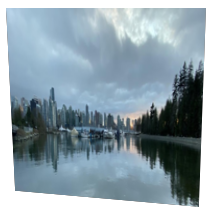

In [6]:
aug(image1)

In [2]:
#@markdown #**Generator Model**

class Generator:
    def __init__(self, args, device, model):
      random.seed(args.seed)
      self.args = args
      self.device = device
      self.model = model
      self.augment = transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.7,0.9)),
        transforms.RandomPerspective(fill=1, p=0.4, distortion_scale=0.5),
        # transforms.RandomErasing(p=0.5, scale=(0.02, 0.1), value=1),
        transforms.ColorJitter(hue=0.1, saturation=0.1),
        # transforms.RandomHorizontalFlip(p=0.5),
        # transforms.RandomVerticalFlip(p=0.5),
        # transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)),
        ])
      r = torch.linspace(-args.grid_row_extent, args.grid_row_extent, 224)
      c = torch.linspace(-args.grid_col_extent, args.grid_col_extent, 224)
      grid = torch.meshgrid(r, c)
      self.grid = torch.stack(grid, dim=2).to(args.device)
      self.coordpairs = torch.stack([torch.arange(0, args.crs_points + 2 - 3, 1),
                              torch.arange(1, args.crs_points + 2 - 2, 1),
                              torch.arange(2, args.crs_points + 2 - 1, 1),
                              torch.arange(3, args.crs_points + 2, 1)], dim=1)

      # scale the sigmas to match the grid defined above, rather than being relative to 1 pixel
      self.args.sf = (2 / 224) ** 2
      self.args.init_sigma2 = args.init_sigma2 * self.args.sf
      self.args.final_sigma2 = args.final_sigma2 * self.args.sf
      self.args.sigma2_current = args.init_sigma2

    def make_init_cparams(self, args):
      if args.colour:
        args.channels = 3
        cparams = torch.full((args.points + args.lines + args.crs, 3), 0.5, device=args.device)
        # cparams = torch.rand((args.points + args.lines + args.crs, 3), device=args.device)
      else:
        args.channels = 1
        cparams = None
      return cparams

    def setup_params(self):
      sigma2params = None
      if self.args.opt_sigma2:
          sigma2params = torch.ones(self.args.points + self.args.lines + self.args.crs, device=self.args.device) * self.args.init_sigma2
          self.args.sigma2_current = sigma2params
      params = make_init_params(self.args)
      cparams = self.make_init_cparams(self.args)
      return sigma2params, params, cparams

    def optimize(self, params, cparams, sigma2params, render_fn):
      losses = []
      min_loss = 10
      saved_image = None
      args = self.args
      text_input = clip.tokenize(self.args.prompt).to(self.device)

      fig = plt.figure(figsize=(15, 7))
      camera = Camera(fig)
      sp2 = fig.add_subplot(1, 2, 1)
      sp2.set_title("Estimate")
      sp1 = fig.add_subplot(1, 2, 2)
      sp1.set_title("Losses")

      with torch.no_grad():
          # img = preprocess(image).unsqueeze(0).to(device)
          text_features = self.model.encode_text(text_input)

      params.requires_grad = True
      if cparams is not None:
          cparams.requires_grad = True
      if sigma2params is not None:
          sigma2params.requires_grad = True
          sigma2 = sigma2params
      else:
          sigma2 = args.init_sigma2

      # optim = make_optimiser(args, params, cparams, sigma2params)
      params_optim = torch.optim.Adam([params], lr=args.lr)
      sigma2_optim = torch.optim.Adam([sigma2], lr=args.sigma2_lr)
      color_optim = torch.optim.Adam([cparams], lr=args.colour_lr)
      itr = tqdm(range(args.iters))
      scheduler = torch.optim.lr_scheduler.MultiStepLR(params_optim, verbose=True, milestones=[50,100,150], gamma=0.4)

      #main optimisation loop
      for i in itr:
          lss, NUM_AUGS, img_augs = 0, 4, []
          params_optim.zero_grad()
          sigma2_optim.zero_grad()
          color_optim.zero_grad()

          est = render_fn(params, cparams, sigma2) # NCHW
          for n in range(NUM_AUGS):
            img_augs.append(self.augment(est))
          im_batch = torch.cat(img_augs)
          image_features = self.model.encode_image(im_batch)
          for n in range(NUM_AUGS):
            lss -= torch.cosine_similarity(text_features, image_features[n:n+1])

          if i >= args.last_iters * args.iters and lss.item() < min_loss:
            min_loss = lss.item()
            saved_image = est
        
          losses.append(lss.item())
          lss.backward()

          params_optim.step()
          sigma2_optim.step()
          color_optim.step()
          scheduler.step()

          params = clamp_params(params, args)
          if cparams is not None:
              clamp_colour_params(cparams)

          if sigma2params is not None:
              mask = sigma2params.data < 1e-6
              # print(torch.sum(mask))

              if args.lines > 0 and args.restarts:
                lparams = params[2 * args.points: 2 * args.points + 4 * args.lines].view(args.lines, 2, 2).data
                for j in range(len(mask)):
                  if mask[j] and i < args.iters / 2:
                    torch.random.seed()
                    # lparams[j] = torch.rand_like(lparams[j]) - 0.5
                    lparams[j] = torch.rand((1, 2, 2))
                    lparams[j, 0, 0] -= 0.5
                    lparams[j, 0, 1] -= 0.5
                    lparams[j, 0, 0] *= 2 * args.grid_row_extent
                    lparams[j, 0, 1] *= 2 * args.grid_col_extent
                    lparams[j, 1, 0] = lparams[j, 0, 0] + 0.2 * (lparams[j, 1, 0] - 0.5)
                    lparams[j, 1, 1] = lparams[j, 0, 1] + 0.2 * (lparams[j, 1, 1] - 0.5)

                    sigma2params.data[j] += args.init_sigma2

              if i < args.iters / 2 and args.restarts:
                  sigma2params.data.clamp_(1e-6, args.init_sigma2)
              else:
                  sigma2params.data.clamp_(1e-6, args.init_sigma2)

          if sigma2params is None:
              if i % args.sigma2_step == 0:
                  sigma2 = sigma2 * args.sigma2_factor
                  if sigma2 < args.final_sigma2:
                      sigma2 = args.final_sigma2

              args.sigma2_current = sigma2
              itr.set_postfix({'loss': lss.item(), 'sigma^2': sigma2})
          else:
              itr.set_postfix({'loss': lss.item(), 'sigma^2': 'learned'})

          if i % args.snapshots_steps == 0:
            ras = render_fn(params, cparams, sigma2)
            if i % args.predict_steps == 0:
              with torch.no_grad():
                im = transforms.ToPILImage()(ras.detach().cpu().squeeze(0)).convert("RGB")
                display(im)
                print('render loss:', lss.item())
                print('iteration:', itr)
                im_norm = image_features / image_features.norm(dim=-1, keepdim=True)
                noun_norm = nouns_features / nouns_features.norm(dim=-1, keepdim=True)
                similarity = (100.0 * im_norm @ noun_norm.T).softmax(dim=-1)
                values, indices = similarity[0].topk(5)
                print("\nTop predictions:\n")
                for value, index in zip(values, indices):
                    print(f"{nouns[index]:>16s}: {100 * value.item():.2f}%")

            sp2.imshow(ras.squeeze(0).permute(1, 2, 0).detach().cpu())
            camera.snap()
            if args.snapshots_path is not None:
              save_img(ras.detach().cpu().squeeze(0), args.snapshots_path + "/snapshot_" + str(i) + ".png")
              save_pdf(params, cparams, args, args.snapshots_path + "/snapshot_" + str(i) + ".pdf")

      sp1.plot(np.linspace(1, len(losses), len(losses)), losses)
      anim = camera.animate(repeat=False)
      plt.close()
      return params, anim, min_loss, losses, saved_image

    def r(self, p, cp, s):
      return 1-render(p, cp, s, self.grid, self.coordpairs, self.args)

    def generate(self):
      sigma2params, params, cparams = self.setup_params()

      if args.init_raster is not None:
        ras = self.r(params, cparams, sigma2params)
        save_img(ras.detach().cpu().squeeze(0), self.args.final_raster)

      if args.init_pdf is not None:
        save_pdf(params, cparams, args, self.args.init_pdf)

      params, anim, min_loss, losses, saved_image = self.optimize(params, cparams, sigma2params, self.r)

      if self.args.final_raster is not None:
        ras = self.r(params, cparams, self.args.sigma2_current)
        save_img(ras.detach().cpu().squeeze(0), self.args.final_raster)

      if self.args.final_pdf is not None:
        save_pdf(params, cparams, self.args, self.args.final_pdf)
      
      if self.args.final_animation is not None:
        save_animation(anim, self.args.final_animation)

      if self.args.best_loss_img_path is not None:
        save_img(saved_image.detach().cpu().squeeze(0), self.args.best_loss_img_path)

      if self.args.loss_img_path is not None:
        plt.plot(np.linspace(1, len(losses), len(losses)), losses)
        plt.savefig(self.args.loss_img_path)

      return anim, min_loss

  0%|          | 0/100 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


  0%|          | 0/100 [00:00<?, ?it/s, loss=-.992, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


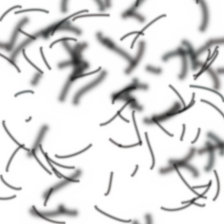

render loss: -0.99169921875
iteration:   0%|          | 0/100 [00:00<?, ?it/s, loss=-.992, sigma^2=learned]

Top predictions:

         density: 0.70%
       algorithm: 0.55%
       covariate: 0.42%
          amount: 0.40%
         texture: 0.40%


  2%|▏         | 2/100 [00:01<00:48,  2.03it/s, loss=-1, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


  3%|▎         | 3/100 [00:01<00:37,  2.61it/s, loss=-1.07, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


  4%|▍         | 4/100 [00:01<00:31,  3.01it/s, loss=-1.12, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


  5%|▌         | 5/100 [00:01<00:28,  3.32it/s, loss=-1.11, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


  6%|▌         | 6/100 [00:02<00:26,  3.53it/s, loss=-1.15, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


  7%|▋         | 7/100 [00:02<00:25,  3.63it/s, loss=-1.17, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


  8%|▊         | 8/100 [00:02<00:24,  3.73it/s, loss=-1.06, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


  9%|▉         | 9/100 [00:02<00:23,  3.80it/s, loss=-1.1, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 10%|█         | 10/100 [00:03<00:23,  3.85it/s, loss=-1.14, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 11%|█         | 11/100 [00:03<00:22,  3.87it/s, loss=-1.13, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 12%|█▏        | 12/100 [00:03<00:22,  3.87it/s, loss=-1.13, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 13%|█▎        | 13/100 [00:03<00:22,  3.91it/s, loss=-1.15, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 14%|█▍        | 14/100 [00:04<00:22,  3.90it/s, loss=-1.15, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 15%|█▌        | 15/100 [00:04<00:21,  3.88it/s, loss=-1.16, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 16%|█▌        | 16/100 [00:04<00:21,  3.89it/s, loss=-1.19, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 17%|█▋        | 17/100 [00:04<00:21,  3.89it/s, loss=-1.17, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 18%|█▊        | 18/100 [00:05<00:20,  3.91it/s, loss=-1.18, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 19%|█▉        | 19/100 [00:05<00:20,  3.89it/s, loss=-1.18, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 20%|██        | 20/100 [00:05<00:20,  3.91it/s, loss=-1.18, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 21%|██        | 21/100 [00:05<00:20,  3.92it/s, loss=-1.18, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 22%|██▏       | 22/100 [00:06<00:19,  3.95it/s, loss=-1.17, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 23%|██▎       | 23/100 [00:06<00:19,  3.95it/s, loss=-1.16, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 24%|██▍       | 24/100 [00:06<00:19,  3.97it/s, loss=-1.17, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 25%|██▌       | 25/100 [00:06<00:18,  3.98it/s, loss=-1.19, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 26%|██▌       | 26/100 [00:07<00:18,  3.96it/s, loss=-1.22, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 27%|██▋       | 27/100 [00:07<00:18,  3.96it/s, loss=-1.15, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 28%|██▊       | 28/100 [00:07<00:18,  3.94it/s, loss=-1.22, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 29%|██▉       | 29/100 [00:07<00:17,  3.95it/s, loss=-1.21, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 30%|███       | 30/100 [00:08<00:17,  3.97it/s, loss=-1.19, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 31%|███       | 31/100 [00:08<00:17,  3.96it/s, loss=-1.2, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 32%|███▏      | 32/100 [00:08<00:17,  3.98it/s, loss=-1.23, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 33%|███▎      | 33/100 [00:08<00:16,  3.98it/s, loss=-1.23, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 34%|███▍      | 34/100 [00:09<00:16,  3.97it/s, loss=-1.18, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 35%|███▌      | 35/100 [00:09<00:16,  3.95it/s, loss=-1.21, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 36%|███▌      | 36/100 [00:09<00:16,  3.93it/s, loss=-1.21, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 37%|███▋      | 37/100 [00:09<00:15,  3.98it/s, loss=-1.23, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 38%|███▊      | 38/100 [00:10<00:15,  3.98it/s, loss=-1.23, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 39%|███▉      | 39/100 [00:10<00:15,  3.97it/s, loss=-1.23, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 40%|████      | 40/100 [00:10<00:15,  3.98it/s, loss=-1.24, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 41%|████      | 41/100 [00:10<00:14,  3.98it/s, loss=-1.26, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 42%|████▏     | 42/100 [00:11<00:14,  4.00it/s, loss=-1.24, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 43%|████▎     | 43/100 [00:11<00:14,  4.00it/s, loss=-1.24, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 44%|████▍     | 44/100 [00:11<00:14,  3.99it/s, loss=-1.22, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 45%|████▌     | 45/100 [00:11<00:13,  3.98it/s, loss=-1.25, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 46%|████▌     | 46/100 [00:12<00:13,  3.96it/s, loss=-1.24, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 47%|████▋     | 47/100 [00:12<00:13,  3.97it/s, loss=-1.23, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 48%|████▊     | 48/100 [00:12<00:12,  4.01it/s, loss=-1.2, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 49%|████▉     | 49/100 [00:12<00:13,  3.87it/s, loss=-1.23, sigma^2=learned]

Adjusting learning rate of group 0 to 1.0000e-02.


 50%|█████     | 50/100 [00:13<00:12,  3.91it/s, loss=-1.19, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 50%|█████     | 50/100 [00:13<00:12,  3.91it/s, loss=-1.22, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


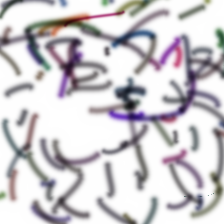

render loss: -1.216796875
iteration:  50%|█████     | 50/100 [00:13<00:12,  3.91it/s, loss=-1.22, sigma^2=learned]

Top predictions:

             cat: 0.74%
             fur: 0.52%
            tofu: 0.45%
          nougat: 0.36%
     millisecond: 0.32%


 52%|█████▏    | 52/100 [00:14<00:18,  2.65it/s, loss=-1.24, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 53%|█████▎    | 53/100 [00:14<00:16,  2.93it/s, loss=-1.27, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 54%|█████▍    | 54/100 [00:14<00:14,  3.18it/s, loss=-1.22, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 55%|█████▌    | 55/100 [00:15<00:13,  3.38it/s, loss=-1.25, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 56%|█████▌    | 56/100 [00:15<00:12,  3.54it/s, loss=-1.26, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 57%|█████▋    | 57/100 [00:15<00:11,  3.63it/s, loss=-1.26, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 58%|█████▊    | 58/100 [00:15<00:11,  3.74it/s, loss=-1.25, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 59%|█████▉    | 59/100 [00:16<00:10,  3.80it/s, loss=-1.25, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 60%|██████    | 60/100 [00:16<00:10,  3.86it/s, loss=-1.22, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 61%|██████    | 61/100 [00:16<00:10,  3.89it/s, loss=-1.24, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 62%|██████▏   | 62/100 [00:16<00:09,  3.94it/s, loss=-1.23, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 63%|██████▎   | 63/100 [00:17<00:09,  3.97it/s, loss=-1.27, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 64%|██████▍   | 64/100 [00:17<00:09,  3.99it/s, loss=-1.23, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 65%|██████▌   | 65/100 [00:17<00:08,  4.00it/s, loss=-1.25, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 66%|██████▌   | 66/100 [00:17<00:08,  4.00it/s, loss=-1.21, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 67%|██████▋   | 67/100 [00:18<00:08,  4.02it/s, loss=-1.24, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 68%|██████▊   | 68/100 [00:18<00:08,  4.00it/s, loss=-1.24, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 69%|██████▉   | 69/100 [00:18<00:07,  3.94it/s, loss=-1.23, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 70%|███████   | 70/100 [00:18<00:07,  3.97it/s, loss=-1.25, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 71%|███████   | 71/100 [00:19<00:07,  3.98it/s, loss=-1.3, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 72%|███████▏  | 72/100 [00:19<00:06,  4.00it/s, loss=-1.28, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 73%|███████▎  | 73/100 [00:19<00:06,  3.96it/s, loss=-1.28, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 74%|███████▍  | 74/100 [00:19<00:06,  3.95it/s, loss=-1.24, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 75%|███████▌  | 75/100 [00:20<00:06,  3.93it/s, loss=-1.26, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 76%|███████▌  | 76/100 [00:20<00:06,  3.93it/s, loss=-1.26, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 77%|███████▋  | 77/100 [00:20<00:05,  3.92it/s, loss=-1.26, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 78%|███████▊  | 78/100 [00:20<00:05,  3.95it/s, loss=-1.25, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 79%|███████▉  | 79/100 [00:21<00:05,  3.94it/s, loss=-1.28, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 80%|████████  | 80/100 [00:21<00:05,  3.96it/s, loss=-1.3, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 81%|████████  | 81/100 [00:21<00:04,  3.92it/s, loss=-1.25, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 82%|████████▏ | 82/100 [00:21<00:04,  3.92it/s, loss=-1.26, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 83%|████████▎ | 83/100 [00:22<00:04,  3.94it/s, loss=-1.28, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 84%|████████▍ | 84/100 [00:22<00:04,  3.96it/s, loss=-1.27, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 85%|████████▌ | 85/100 [00:22<00:03,  3.94it/s, loss=-1.26, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 86%|████████▌ | 86/100 [00:22<00:03,  3.97it/s, loss=-1.28, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 87%|████████▋ | 87/100 [00:23<00:03,  4.00it/s, loss=-1.28, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 88%|████████▊ | 88/100 [00:23<00:02,  4.02it/s, loss=-1.29, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 89%|████████▉ | 89/100 [00:23<00:02,  3.99it/s, loss=-1.25, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 90%|█████████ | 90/100 [00:23<00:02,  4.01it/s, loss=-1.3, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 91%|█████████ | 91/100 [00:24<00:02,  4.00it/s, loss=-1.31, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 92%|█████████▏| 92/100 [00:24<00:01,  4.00it/s, loss=-1.31, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 93%|█████████▎| 93/100 [00:24<00:01,  3.94it/s, loss=-1.26, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 94%|█████████▍| 94/100 [00:24<00:01,  3.93it/s, loss=-1.3, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 95%|█████████▌| 95/100 [00:25<00:01,  3.94it/s, loss=-1.28, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 96%|█████████▌| 96/100 [00:25<00:01,  3.96it/s, loss=-1.33, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 97%|█████████▋| 97/100 [00:25<00:00,  3.98it/s, loss=-1.31, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 98%|█████████▊| 98/100 [00:25<00:00,  3.97it/s, loss=-1.31, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


 99%|█████████▉| 99/100 [00:26<00:00,  3.97it/s, loss=-1.29, sigma^2=learned]

Adjusting learning rate of group 0 to 4.0000e-03.


100%|██████████| 100/100 [00:26<00:00,  3.78it/s, loss=-1.26, sigma^2=learned]

Adjusting learning rate of group 0 to 1.6000e-03.


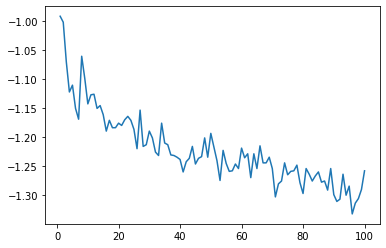

In [135]:
import argparse
from datetime import datetime
from timeit import default_timer as timer
from time import sleep


def save_results(args, init_sigma2, time, best_loss, clip_similarity=None, result_img=None, loss_graph=None, additonal=None):
  time = datetime.today().strftime('%Y-%m-%d-%H:%M:%S')
  row=[time, args.lines, args.crs, args.iters, args.lr, args.colour_lr, args.sigma2_lr, init_sigma2, args.restarts, time, best_loss, clip_similarity, result_img, loss_graph, additonal]
  worksheet = gc.open('DiffDrawing runs').sheet1
  worksheet.append_row(row, value_input_option='USER_ENTERED')

time = datetime.today().strftime('%Y-%m-%d-%H:%M:%S')
prompt = "drawing of a cat"
snapshots = 50
init_sigma2 = 15.0
folder = "drive/MyDrive/3rd_yr_project/snaps"

args = argparse.Namespace(
        prompt = prompt,
        seed = 1234,
        iters = 100,
        lines = 0,
        crs = 100,
        crs_points =2,
        points = 0,
        colour = True,
        lr = 0.01,     #0.004
        colour_lr = 0.01,
        opt_sigma2 = True,
        final_sigma2 = 0.55 ** 2,
        init_sigma2 = init_sigma2,
        sigma2_lr = 0.001,           #  0.00001
        snapshots_steps = snapshots,
        predict_steps = snapshots*1,
        device = 'cuda:0',
        loss_img_path="{}/{}-{}/loss.png".format(folder, prompt, time),
        best_loss_img_path="{}/{}-{}/best_loss.png".format(folder, prompt, time),
        config_path = "{}/{}-{}".format(folder, prompt, time),
        final_pdf = "{}/{}-{}/{}-final-{}.pdf".format(folder, prompt, time, prompt, time),
        final_animation = "{}/{}-{}/{}-final-{}.mp4".format(folder, prompt, time, prompt, time),
        final_raster = "{}/{}-{}/{}-final-{}.png".format(folder, prompt, time, prompt, time),
        init_raster = "{}/{}-{}/{}-init-{}.png".format(folder, prompt, time, prompt, time),
        init_pdf = "{}/{}-{}/{}-init-{}.pdf".format(folder, prompt, time, prompt, time),
        snapshots_path = "{}/{}-{}".format(folder, prompt, time),
        invert_sketch = True,
        restarts = False,

        sigma2_factor = 0.5, # doesnt matter when opt_sigma2=True
        sigma2_step = 100,  # doesnt matter when opt_sigma2=True
        channels = 3,
        target_shape = torch.Size([1, 3, 224, 224]),
        width = 224,
        sigma2_current = None,
        grid_row_extent = 1,
        grid_col_extent = 1,
        sf = None,
        last_iters = 0.1,
    )

if args.config_path is not None:
  save_config_file(args)

def get_file_link(path, folder=False):
  res = !xattr -p 'user.drive.id' "$path"
  if folder:
    return "https://drive.google.com/drive/u/0/folders/"+res[0]
  return "https://drive.google.com/uc?export=download&id="+res[0]

def wait_for_uploads(path):
  link = get_file_link(path)
  while 'local-' in link:
    sleep(10)
    link = get_file_link(path)
  return link

start = timer()
anim, min_loss = Generator(args, device, model).generate()
end = timer()
time = round(end - start,2)

img = wait_for_uploads(args.best_loss_img_path)
folder = wait_for_uploads(args.config_path)
graph = wait_for_uploads(args.loss_img_path)

save_results(args, init_sigma2, time, min_loss, None, '=IMAGE(\"{}\";4;100;100)'.format(img), '=IMAGE(\"{}\";4;100;100)'.format(graph), '{}'.format(folder))

HTML(anim.to_jshtml())

In [129]:
%ls

'=0.1.0'  '=0.24.1'      '=1.19.2'  '=3.3.2'   '=7.19.0'   drive/
'=0.1.2'  '=0.5.3.dev0'  '=1.7.0'   '=4.54.1'  '=8.0.1'    sample_data/
'=0.15'   '=0.8.1'       '=2.25.0'  '=50.3.1'   adc.json


In [130]:
# %cd -q $args.config_path
img = !xattr -p 'user.drive.id' "$args.config_path"

In [131]:
img[0]

'1ETsOS8c-BFKq6CEKdoPeDcxOeTHHQ2sQ'

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()
!nvidia-smi